# Turing Machine and Deep Learning 2023

## Assignment Unupervised ML

This notebook is meant for you to review and reflect on the content of Lecture 3, which was mainly about unsupervised learning problems. As with last week, this notebook should not be too much quantitative work (lines of code) but keep in mind that running this notebook may take a longer time than you may be used to for python programs (*training good models take time!*)

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a folder called "Week 2" and copy this notebook and any other files or data that may be needed.
2. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


### Grading

Each one of the (sub-)questions below will be graded either 0 (insufficient), 1 (sufficient) or 2 (good). If $N$ is the number of sub-questions, and $p_i$ is your score for sub-question $i$, your total grade $G$ for this assignment is:
$$G=\frac{1}{2 N}\sum_{i=0}^{N}p_i$$

In [28]:
# load common libraries
import numpy as np                 # maths
import pandas as pd                # data manipulation
from tqdm import tqdm              # loading bar
from time import perf_counter      # timer
import matplotlib.pyplot as plt    # plotting

# Q1 Loading and preprocessing data

In this repository, you should find a file called `tmdb_5000_movies.csv` which is information from a subset of movies on The Movie Database.

### Q.1.1
Use pandas to read in the csv file (refer to [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) if you're unfamiliar).

In [29]:
df = pd.read_csv('tmdb_5000_movies TMDL 2024.csv')
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

View information about the dataset including datatypes and null values

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

**Q.1.1.2** What columns have null values above? How would you be able to estimate the missing values?

Columns 'homepage', 'overview', 'release_date', 'runtime', 'tagline' have null values as their non-null count is less than 4803. To estimate the missing values we can use the median of a column, or simply set the values to 0, or interpret it ourselves. This depends on what type of variable we are considering.

### Q1.2
For this notebook, we're only interested in a few columns, specifically title, overview and genres. Set df to only contain those columns.

In [31]:
df = df[['title', 'overview', 'genres']]
df.info() # print out df info to verify

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4803 non-null   object
 1   overview  4800 non-null   object
 2   genres    4803 non-null   object
dtypes: object(3)
memory usage: 112.7+ KB


### Q1.3
We see that some movies do not have an overview. Drop them from the table and reset the index (set `drop=True`).

In [32]:
df = df.dropna(subset=['overview']) # drop na values
df = df.reset_index(drop=True) # reset index

# Q2 One-hot encodings
The following code processes the genres (which you see above are list of dictionaries) and encodes them into one-hot labels.

Remember, since we cannot do maths on text strings, we must change these words to numbers. Here, we create one-hot encodings for the genres. Assume we have three genres $[G_1, G_2, G_3]$. If a movie $M_1$ is tagged with genre $G_1$, the encoding is $[1,0,0]$. If another movie $M_2$ is tagged with $G2$, the encoding becomes $[0,1,0]$. Other encodings are possible as well, but one-hot encoding quite common and useful for many other tasks. In this case, if a movie is tagged with more than one genre, we'll just take a random one and encode that into a one-hot label.

### Q2.1 Processing genres

Finish the following code that processes genres into one-hot encodings.

In [33]:
np.random.seed(0)

def process_genre_string(gs):
    """ Processes genres into a single item from a list"""
    gs = eval(gs)
    gs = [x['name'] for x in gs]
    genre = "Unknown"
    if gs:
        genre = np.random.choice(gs) # choose random entry
    return genre

# TODO: Fill in
def encode_labels(label, unique_labels):
    """ Encodes text labels into a one-hot encoded list
        with possibly more than one one-hot per list.
        :param label: the label you want to one-hot encode
        :unique_labels: the vocabulary
    """
    out = np.zeros(len(unique_labels))
    if label in unique_labels:
        out[unique_labels.index(label)] = 1
    return out

"""
# save genres
processed_genres = []
for index, row in df.iterrows():
    processed_genres.append(process_genre_string(row['genres']))

# sort and remove duplicates to get vocabulary
unique_genres = sorted(list(set(processed_genres)))

# add to dataframe as new column
df["proc_genres"] = processed_genres

# one-hot encode genres
enocded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    enocded_labels.append(encode_labels(row['proc_genres'], unique_genres))

df["one_hot_genres"] = encoded_labels
"""

# Process genres and create a unique genre list
processed_genres = df['genres'].apply(process_genre_string)
unique_genres = sorted(set(processed_genres))
df["proc_genres"] = processed_genres

# One-hot encode genres
encoded_labels = [encode_labels(genre, unique_genres) for genre in processed_genres]

# Assign the list of one-hot encoded genres to the dataframe
df["one_hot_genres"] = encoded_labels

Verify that one-hot encodings are indeed as expected

In [34]:
df["one_hot_genres"][0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

### Q2.2 Processing Overviews
Next, we process the overviews. First, we remove all punctuation for the sake of simplicity and change each overview to use only lowercase. Then we need to see how long the overviews are in terms of numbers of words. We can do this with a histogram.

**Q2.2.1** Finish the following code

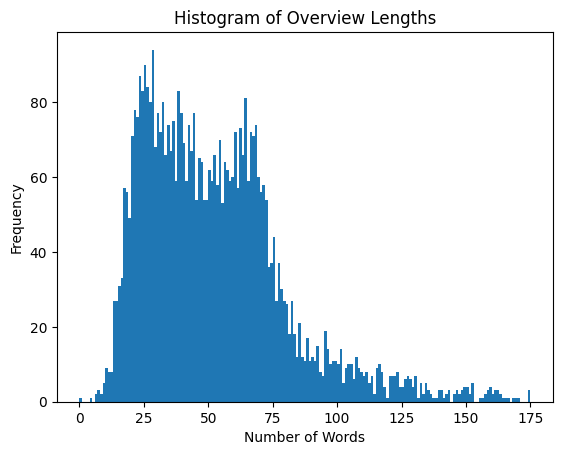

In [35]:
import re
def remove_punctuation(text):
    """ Only retains letters, numbers, underscores and whitespace """
    pattern = r'[^\w\s]'
    return re.sub(pattern, '', text)

processed_overviews = []

# get the word lengths of each overview and store it in a list
overview_lens = []

# loop over df, remove punctuation, make words lowercase and add it to a new column
for overview in df['overview']:
    processed_text = remove_punctuation(overview).lower()
    processed_overviews.append(processed_text)
    overview_lens.append(len(processed_text.split()))

df["proc_overview"] = processed_overviews

# for the sake of simplicity, add these values as a column to the df
df['overview_len'] = overview_lens
plt.hist(overview_lens, bins = 175)
plt.title('Histogram of Overview Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

**Q2.2.2** What is the shortest overview? What is the longest? In the next step, we need to decide on a standard length of all overviews -- this means dropping overviews less than some value, and truncating longer ones. What length would you choose to minimize the number of movies dropped and maximize the information (words) stored in the overviews?

The shortest overview is less than 1 word and the longest is 175 words. As most overviews have a word length between 25 and 75 words, I would choose a length of 25 words. This would include the majority of the overviews without significant truncation.

### Q2.2.3
Let's choose overviews of length 15 words. What this means is we need to discard movies that have overviews less than 15 (there are other ways of dealing with it, but this should be fine for now) and truncate the higher ones to the first 15 words.

In [36]:
token_len = 15 # number of words
# only select rows where overview len is more than or equal to token_len
df = df[df['overview_len'] >= token_len]

# split each proc_overview into a list of words, select the first token_len words,
# and add the list of words back into df["proc_overview"]

df['proc_overview'] = df['proc_overview'].apply(lambda x: ' '.join(x.split()[:token_len]))

# print to verify
df

,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",in the 22nd century a paraplegic marine is dis...,28
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Fantasy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",captain barbossa long believed to be dead has ...,34
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",a cryptic message from bonds past sends him on...,41
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",following the death of district attorney harve...,65
4,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",john carter is a warweary former military capt...,55
...,...,...,...,...,...,...,...
4794,Cavite,"Adam, a security guard, travels from Californi...","[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",adam a security guard travels from california ...,115
4795,El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Crime,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",el mariachi just wants to play his guitar and ...,62
4797,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",TV Movie,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",signed sealed delivered introduces a dedicated...,73
4798,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],Unknown,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",when ambitious new york attorney sam is sent t...,65


### Q2.2.3 Finding the vocabulary length

In order to one-hot encode words, we need to find how many words there are in total, just like in the case of genres. Get all the words, remove duplicates, and sort. Find and print the length of your vocabulary.

In [37]:
# hint: store all words for all movies in a set, change it to a list and sort
all_words = set(word for overview in df['proc_overview'] for word in overview.split())
sorted_words = sorted(all_words)
vocab_len = len(sorted_words)
print(vocab_len)

12493


### Q2.2.4 Encoding the labels

In the case of genres, we one-hot encoded the outputs by taking a single random genre. However, an alternative method is to add up the one-hot encodings to form some kind of histogram. For example, if we have an overview "a brown dog", and our vocab is \[a, brown, big, cabbage, dog, goat, cow, turkey\], the one-hot vector would be \[1,1,0,0,1,0,0,0\]. If our overview is "a big brown dog", the one-hot vector would be \[1,1,1,0,1,0,0,0\]. If our overview is "a big big brown dog", the one-hot vector would be \[1,1,2,0,1,0,0,0\]. You can use the `encode_labels` function that you defined earlier.

In [38]:
# this code is just a hint, if you want you can do it as you please
# as long as the output remains the same
encoded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    sentence_encode = [] # set of encodings for this overview
    for word in row["proc_overview"].split():
        sentence_encode.append(encode_labels(word, sorted_words)) # get encoding for this word
    sentence_encode = np.sum(np.array(sentence_encode), axis=0) # sum over axis=1
    encoded_labels.append(sentence_encode)

df["one_hot_overview"] = encoded_labels
df

100%|██████████| 4707/4707 [00:07<00:00, 632.12it/s]


,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len,one_hot_overview
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",in the 22nd century a paraplegic marine is dis...,28,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Fantasy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",captain barbossa long believed to be dead has ...,34,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",a cryptic message from bonds past sends him on...,41,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",following the death of district attorney harve...,65,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",john carter is a warweary former military capt...,55,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...
4794,Cavite,"Adam, a security guard, travels from Californi...","[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",adam a security guard travels from california ...,115,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4795,El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Crime,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",el mariachi just wants to play his guitar and ...,62,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4797,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",TV Movie,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",signed sealed delivered introduces a dedicated...,73,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4798,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],Unknown,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",when ambitious new york attorney sam is sent t...,65,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


**Q2.2.5** Each vector is a vector of floating point (64-bit) numbers. Assuming each float takes up exactly 16-bytes, how many bytes does this take to store (theoretically)?

Given that we have $n = 15$ floats in each vector, each vector consists of $15 * 16 = 240$ bytes. For the $4707$ vectors, this totals to $4707 * 240 = 1,129,680$ bytes to store this data.

# Q3 Principal Component Analysis

**Q3.1** Using the overview encoded into one-hot encodings, perform PCA and plot this into a 2-D image as a scatter plot.

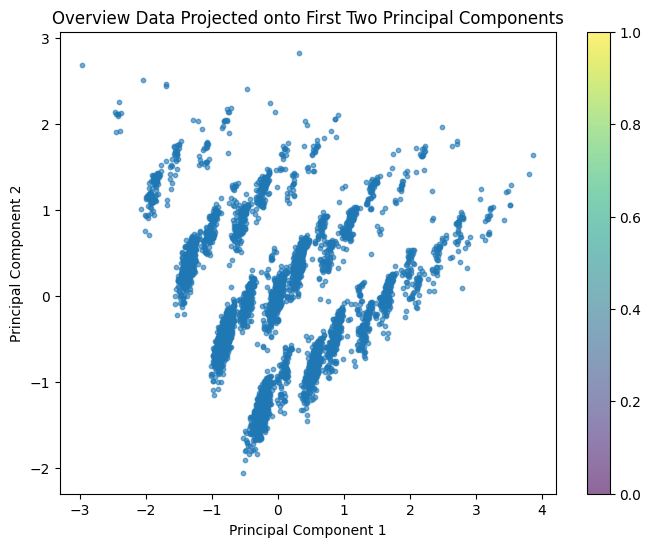

[0.0699188  0.04296571]
[0.0699188  0.11288451]
0.8871154913247568


In [39]:
# import PCA decomposition class from sklearn
from sklearn.decomposition import PCA

X = np.array(df['one_hot_overview'].tolist())
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, s=10)
plt.colorbar()
plt.title('Overview Data Projected onto First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
# we did exactly this in the lecture notebook
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())
print(1 - sum(pca.explained_variance_ratio_))

**Q3.2** Do you see any interpretable structure in the above plot ("interpretable" $\rightarrow$ the patterns are explainable).

There's a broad trend where data points are mostly concentrated along an axis from bottom left to top right.

**Q3.3** Quantify how much variance information a 2D PCA projection loses for this dataset.

By subtracting the explained variance ratios of the first two principal components from 1, we get the amount of variance lost. In our case, this value is 0.89, which means that 89% of the variance is lost when the data is projected onto the first two principal components. The 2D projection has significantly reduced the dimmensionality of the data (potentially) at the cost of losing a considerable amount of information.

**Q3.4** Plot a line graph where the y-axis is cumulative explained variance ratio and the x-axis is the number of PCA components.

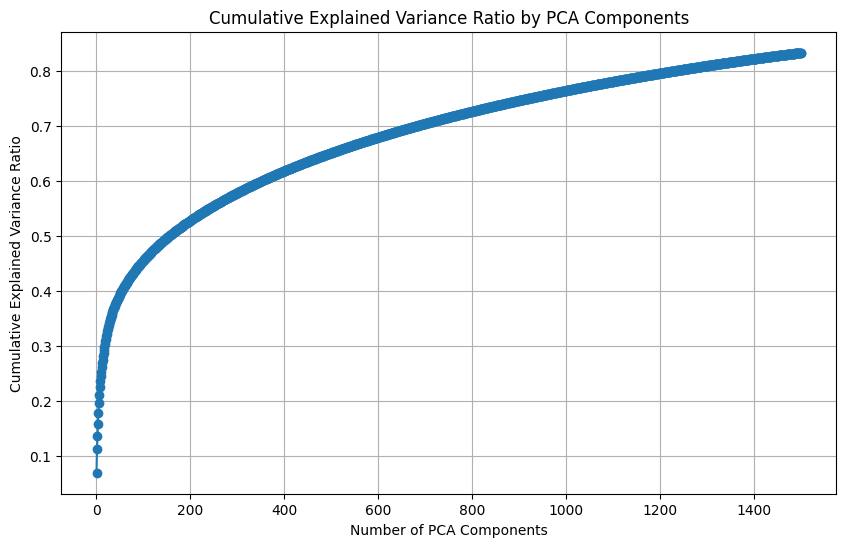

In [40]:
X = np.array(df['one_hot_overview'].tolist())
pca = PCA(n_components=1500)
X_pca = pca.fit_transform(X)

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
x_ticks = np.arange(1, len(cumulative_variance_ratio) + 1)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(x_ticks, cumulative_variance_ratio, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by PCA Components')
plt.grid(True)
plt.show()

**Q3.5** How many principal components do you need in order to explain 80% of the total variance in the data?

Note: don't just estimate it by eye, write some code to compute it for you.

In [41]:
# your code answer here# Find the number of components to explain at least 80% of variance
num_components = np.argmax(cumulative_variance_ratio >= 0.80) + 1
print(num_components)


1233


You need at least 1233 principal components to explain 80% of the total variance in the data

**Q3.6** Using the number of dimensions you found in Q3.5, fit and transform your overview encodings using PCA and add it to a new column called `overview_pca` in the dataframe.

In [42]:
n_dims = 1233
pca = PCA(n_components=n_dims)
labels_pca = pca.fit_transform(X)
df["overview_pca"] = labels_pca.tolist()

In [43]:
df

,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len,one_hot_overview,overview_pca
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",in the 22nd century a paraplegic marine is dis...,28,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.17130556275122627, 1.2545637565428576, 1.06..."
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Fantasy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",captain barbossa long believed to be dead has ...,34,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.3780729300588759, -1.5934718497721907, 0.9..."
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",a cryptic message from bonds past sends him on...,41,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1.9128810490622785, 1.1768562611976836, 0.80..."
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",following the death of district attorney harve...,65,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8229543741729884, -0.44848628373332716, 0.5..."
4,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",john carter is a warweary former military capt...,55,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.10117960365985104, -0.22882078000619546, 0..."
...,...,...,...,...,...,...,...,...,...
4794,Cavite,"Adam, a security guard, travels from Californi...","[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",adam a security guard travels from california ...,115,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.16452917101864564, -0.3582876078237449, 0...."
4795,El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Crime,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",el mariachi just wants to play his guitar and ...,62,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.4396168512078081, -1.1329578847994768, 0.36..."
4797,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",TV Movie,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",signed sealed delivered introduces a dedicated...,73,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.39072083347920145, 0.5742052146672978, -0.2..."
4798,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],Unknown,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",when ambitious new york attorney sam is sent t...,65,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.30154466232942023, -1.1754163046975623, 0...."


# Q4 K-Means Clustering

**Q4.1** Cluster the movies based on the features that were extracted via PCA in the last step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_kmeans`. Print out the elements of cluster number 0 from the dataframe.

In [44]:
# import KMeans class
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = KMeans(n_clusters=20)
# fit model
kmeans.fit(df['overview_pca'].tolist())

y_preds = kmeans.predict(df['overview_pca'].tolist()) # get predictions
df["cluster_kmeans"] = y_preds # set predictions

# print out elements of cluster 0
print(df[df['cluster_kmeans'] == 0])

                                         title  \
1     Pirates of the Caribbean: At World's End   
10                            Superman Returns   
60                           A Christmas Carol   
62                        The Legend of Tarzan   
66                                          Up   
...                                        ...   
4742               The Brain That Wouldn't Die   
4749                            Tiny Furniture   
4756                      The Image Revolution   
4772                               Funny Ha Ha   
4795                               El Mariachi   

                                               overview  \
1     Captain Barbossa, long believed to be dead, ha...   
10    Superman returns to discover his 5-year absenc...   
60    Miser Ebenezer Scrooge is awakened on Christma...   
62    Tarzan, having acclimated to life in London, i...   
66    Carl Fredricksen spent his entire life dreamin...   
...                                          

**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't?

No it does not, I didn't think star trek and Wreck it Ralph are somewhat similar movies

**Q4.3** Now, we'll figure out whether using the elbow method is right for this dataset. Plot a loss (using `kmeans.inertia_`) versus cluster size plot. Is there an elbow that you see clearly? What cluster size would you choose?

From the plot, there isn't a clear, sharp elbow. However, I would say at k = 5, the curve seems to plateau for the first time before becoming steeper again. So a cluster size of 5 would maybe be a good choice.

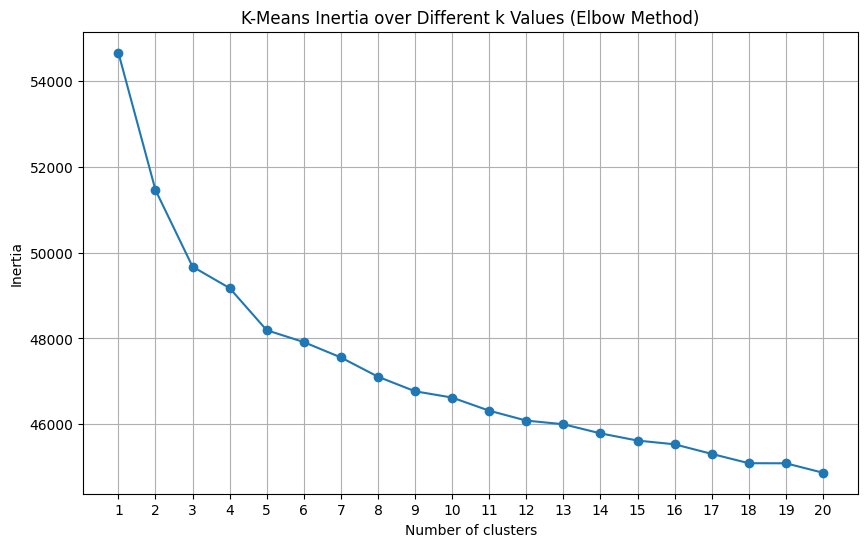

In [45]:
inertia = []
k_values = range(1, 21)
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df['overview_pca'].tolist())
    inertia.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('K-Means Inertia over Different k Values (Elbow Method)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Q5 Gaussian Mixture Models

**Q5.1** As with the K-means above, cluster the movies based on the features that were extracted via PCA in a previous step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_gmm`. Print out the elements of a single cluster of your choice from the dataframe.

In [46]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=20)
gmm.fit(df['overview_pca'].tolist())

df['cluster_gmm'] = gmm.predict(df['overview_pca'].tolist())
print(df[df['cluster_gmm'] == 0])

                                           title  \
9             Batman v Superman: Dawn of Justice   
11                             Quantum of Solace   
12    Pirates of the Caribbean: Dead Man's Chest   
13                               The Lone Ranger   
28                                Jurassic World   
...                                          ...   
4764                              Run, Hide, Die   
4766                     The Legend of God's Gun   
4782                        Stories of Our Lives   
4793                                      Primer   
4797                   Signed, Sealed, Delivered   

                                               overview  \
9     Fearing the actions of a god-like Super Hero l...   
11    Quantum of Solace continues the adventures of ...   
12    Captain Jack Sparrow works his way out of a bl...   
13    The Texas Rangers chase down a gang of outlaws...   
28    Twenty-two years after the events of Jurassic ...   
...                  

**Q5.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't? How does this compare to K-Means Clustering?

I don't know all of the listed movies, but the first few seem to have some similarity in the fact that it is action related. It seems better than K-Means clustering as that had scifi and fiction clustered.

**Q5.3** Let's check out the size of the clusters. Create a double bar plot (**as you did in the last assignment**) showing the different sizes of the clusters.

*Hint: you may want to consider `df.value_counts()` if you're unfamiliar.*

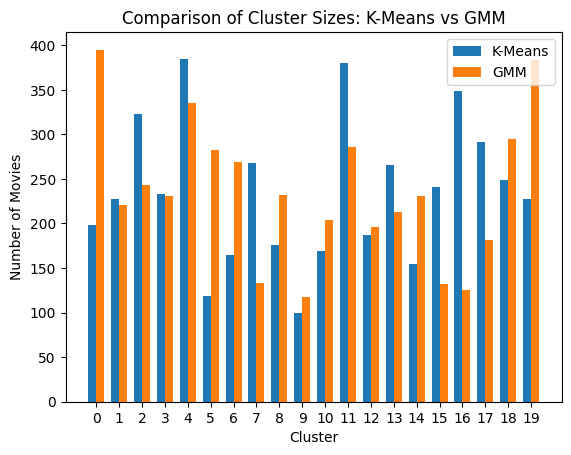

In [47]:
kmeans_cluster_size = df['cluster_kmeans'].value_counts().sort_index()
gmm_cluster_size = df['cluster_gmm'].value_counts().sort_index()

x = np.arange(len(kmeans_cluster_size))
bar_width = 0.35

fig, ax = plt.subplots()
kmeans_bars = ax.bar(x - bar_width/2, kmeans_cluster_size, bar_width, label='K-Means')
gmm_bars = ax.bar(x + bar_width/2, gmm_cluster_size, bar_width, label='GMM')

ax.set_xlabel('Cluster')
ax.set_ylabel('Number of Movies')
ax.set_title('Comparison of Cluster Sizes: K-Means vs GMM')
ax.set_xticks(x)
ax.set_xticklabels([str(i) for i in x])
ax.legend()
plt.show()

**Q5.4** Do you see a significant difference in the sizes of the clusters? Which is more uniform? Any thought on why?

There is a significant difference in cluster sizes for both K-Means and GMM. Some clusters have a lot more movies assigned to them than others. The distribution of cluster sizes for K-Means seems to have a few peaks where certain clusters are much larger than the rest. GMM appears to have a slightly more uniform distribution of cluster sizes compared to K-Means.

The more uniform distribution of GMM might be due to the algorithm's probabilistic nature. This allows for a "softer" assignment of points to clusters based on probability distributions rather than the "harder" assignment of points used by K-Means.

# Q6: A very simple recommender system

One useful thing that clustering is often used for (though at a much greater complexity) is in **recommender systems**. These are systems with users and items (movies, files, documents, etc.), where new items are shown to the user based on what they've previously interacted with, and possibly also on the behaviour of other users.

**Q6.1** Assume your dentist has just watched the movie Avatar and asks you for a recommendation. Lucky for you, you just finished this assignment. Using the cluster indices of the movie Avatar for both the K-means and GMM methods, print out suggestions for new movies.

In [48]:
prev_watch = "Avatar"

cluster_kmeans = df[df['title'] == prev_watch]['cluster_kmeans'].iloc[0] # find what cluster index Avatar falls into for k-means
cluster_gmm = df[df['title'] == prev_watch]['cluster_gmm'].iloc[0] # find what cluster index Avatar falls into for gmm


# print out similar movies
print("Movies similar to Avatar according to K-means clustering:")
print(df[df['cluster_kmeans'] == cluster_kmeans]['title'])

print("Movies similar to Avatar according to GMM clustering:")
print(df[df['cluster_gmm'] == cluster_gmm]['title'])


Movies similar to Avatar according to K-means clustering:
0                             Avatar
75                        Waterworld
78                   The Jungle Book
97                     Shin Godzilla
104                         Poseidon
                    ...             
4725    The Lost Skeleton of Cadavra
4735                              Pi
4738                      Queen Crab
4751                   The Naked Ape
4755                      The Signal
Name: title, Length: 165, dtype: object
Movies similar to Avatar according to GMM clustering:
0                             Avatar
31                        Iron Man 3
48             Jack the Giant Slayer
55                             Brave
116                      I Am Legend
                    ...             
4679                    Super Hybrid
4682    The Case of the Grinning Cat
4694             She's Gotta Have It
4728           Indie Game: The Movie
4789                            Cure
Name: title, Length: 213, dtype: o

**Q6.2** Are any of the two recommender systems any good? Would you use them if your real dentist asks for a movie suggestion?

The recommendations seem to include a broad mix of genres and periods, so I would not use them if my dentist asks for a movie suggestion.

**Q6.3** How would you try making the recommender systems better?

I think the system can get better by incorporating more refined features that better capture the essence of movies, like genre, director, cast, budget, and audience ratings. Not just the first 15 words of a movie description.

**Q6.4** Say your dentist likes the movies you suggested and has watched a few more since you met him last. How would you incorporate this fact (recommendation based on multiple movies) into your suggestions?

I would include the movies to refine the recommender system.

**Q6.5** An alternative method for recommendations is to use your encoded movie-feature vectors (in this case your overview+PCA vector) in order to find out what movie may be most similar to the current one. In the case of K-Means and GMMs, "similarity" referred to Euclidean distance. However, in this exercise, we will use *cosine similarity*, which is another very common similarity measure, and is related to the angle between two vectors. It is defined as:

$$sim(v_1, v_2)=\frac{v_1\cdot v_2}{||v_1||\cdot||v_2||}$$

Where $v_1$ and $v_2$ are vectors and the operator $||\cdot||$ is the norm of the vector. The function ranges from $[-1,1]$ (where 1 means that the vectors point in the same direction).

Define an appropriate function `cosine_sim`. Add a column called `cos_sim_to_avatar` in the df and print out the head of the df, sorted by the similarity. What movies would you recommend now? Is this better than the clustering methods?

In [49]:
from numpy.linalg import norm

def cosine_sim(v1, v2):
    return np.dot(v1, v2) / norm(v1) * norm(v2)

# get overview_pca encoding of previously watched film
prev_watch_enc = df[df['title'] == 'Avatar']['overview_pca'].values[0]

sims = [] # set up place to store similarities
for i, row in df.iterrows():
    sims.append(cosine_sim(prev_watch_enc, row['overview_pca']))

df["cos_sim_to_avatar"] = sims
df = df.sort_values(by='cos_sim_to_avatar', ascending=False) # sort df
df.head() # print to verify

,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len,one_hot_overview,overview_pca,cluster_kmeans,cluster_gmm,cos_sim_to_avatar
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",in the 22nd century a paraplegic marine is dis...,28,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.17130556275122627, 1.2545637565428576, 1.06...",6,13,9.057605
311,The Adventures of Pluto Nash,"The year is 2087, the setting is the moon. Plu...","[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",the year is 2087 the setting is the moon pluto...,56,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.8274342420911642, 0.5573095748993873, 0.868...",12,17,7.781984
1693,Seed of Chucky,The killer doll is back! The all-new film is t...,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 27, ""name...",Horror,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",the killer doll is back the allnew film is the...,64,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.8667519572862346, 0.6297716015863274, 0.724...",12,17,7.430702
1775,The Statement,"The film is set in France in the 1990s, the Fr...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",the film is set in france in the 1990s the fre...,98,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.9157642830839454, 0.6883052641232721, 0.492...",12,17,7.190344
3130,Of Horses and Men,A country romance about the human streak in th...,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",Drama,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",a country romance about the human streak in th...,36,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.3286215317680603, 1.2211158485409264, -0.06...",12,17,7.181168


Yea I think it is better now, it seems the movies are matched better than the clustering methods.

# Q7 Unsupervised Learning as a Tool

At the end of this brief forey into natural language processing, we will end with an interesting task: can a machine predict the genre of a movie based purely on the first 10 words of its overview?

First, the following cell shuffles the dataset and splits it into a training and test set. The random seed and random state ensure that the train and test samples are the same for you all the time, and *probably* your classmates too. You can verify this by printing out the dataframes and checking it for yourself.

In [50]:
np.random.seed(0)
n_train = int(0.8*len(df))
df_shuffle = df.sample(frac=1, random_state=42).reset_index(drop=True)
df_train = df_shuffle[:n_train].reset_index(drop=True)
df_test = df_shuffle[n_train:].reset_index(drop=True)
print(len(df_train), len(df_test))

3765 942


In [51]:
df_train

,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len,one_hot_overview,overview_pca,cluster_kmeans,cluster_gmm,cos_sim_to_avatar
0,Suspect Zero,"A killer is on the loose, and an FBI agent sif...","[{""id"": 80, ""name"": ""Crime""}, {""id"": 53, ""name...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",a killer is on the loose and an fbi agent sift...,26,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.029833027764405436, -0.3177985089611441, -...",2,6,1.005937
1,"It's a Mad, Mad, Mad, Mad World",A group of strangers come across a man dying a...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",a group of strangers come across a man dying a...,43,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1.57401933395277, 1.7424827006196186, -0.238...",11,9,0.496822
2,Adore,"Lil and Roz are two lifelong friends, having g...","[{""id"": 18, ""name"": ""Drama""}]",Drama,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",lil and roz are two lifelong friends having gr...,62,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.17583858119738985, -1.3137069277147255, -0...",2,1,-2.557042
3,Contraband,When his brother-in-law runs afoul of a drug l...,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 28, ""n...",Crime,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",when his brotherinlaw runs afoul of a drug lor...,42,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.5882643441329587, -0.21904083187619625, 0....",19,4,-1.323023
4,Little Big Top,An aging out of work clown returns to his smal...,"[{""id"": 35, ""name"": ""Comedy""}]",Comedy,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",an aging out of work clown returns to his smal...,40,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.6612061128712001, -0.8588679208691937, 1.38...",0,11,-0.597219
...,...,...,...,...,...,...,...,...,...,...,...,...
3760,Travellers and Magicians,"A young government official, named Dondup, who...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",a young government official named dondup who i...,93,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1.4058043937217333, 0.577024232495386, 0.065...",7,14,0.398292
3761,Love and Other Catastrophes,A day in the life of two film-school students ...,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",Romance,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",a day in the life of two filmschool students t...,16,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.26279379003370157, 0.14501772179127734, -0....",17,6,0.555991
3762,Blue Streak,Miles Logan is a jewel thief who just hit the ...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",miles logan is a jewel thief who just hit the ...,60,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.5566711382353698, 0.9616980895954407, 0.25...",6,14,1.964237
3763,"Run, Fatboy, Run",Five years after jilting his pregnant fiancée ...,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",Comedy,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",five years after jilting his pregnant fiancée ...,22,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.28324132078534603, -1.3807737709731829, 0....",0,4,-1.165133


## Train, test, evaluate

Using a supervised learning method of your choice, try predicting the genre of a movie from the overview. The way you preprocess your data is up to you, and you can take inspiration from the above exercises (e.g. PCA on the one-hot encodings as input, one-hot label encodings as output). There are a number of hyperparameters you can choose depending on your selected method (number of words in your overview, number of dimensions, number of clusters, hyperparameters of your supervised model...), thus, make sure to perform hyperparameter optimization in some way (grid-search, fine-tuning, etc). Once you are happy with how your model is performing, **print out the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model**.

If you are already excited about neural networks, you may also choose to use that as your supervised method. The easiest way to do it is with sklearn's `MLPClassifier` module. The main hyperparameter you would need to tune is the architecture of your model -- how many hidden layers, and how large is each one. For this task, in order to get best performance, you do not necessarily need an MLP (multi-layer perceptron) but feel free to experiment.

*Hint: the `train_and_eval` function from the last assignment should be of great help here*

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
import time

X_train = np.array(df_train['one_hot_overview'].tolist())
y_train = np.array(df_train['one_hot_genres'].tolist())
X_test = np.array(df_test['one_hot_overview'].tolist())
y_test = np.array(df_test['one_hot_genres'].tolist())

pca = PCA(n_components=3000)
# Fit PCA on the entire dataset
all_X = np.concatenate((X_train, X_test), axis=0)
pca.fit(all_X)

# Transform the datasets
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize the models
models = {
    #'LogisticRegression1': OneVsRestClassifier(LogisticRegression(max_iter=10)),
    #'LogisticRegression2': OneVsRestClassifier(LogisticRegression(max_iter=50)),
    #'LogisticRegression3': OneVsRestClassifier(LogisticRegression(max_iter=100)),
    #'LogisticRegression4': OneVsRestClassifier(LogisticRegression(max_iter=250)),
    #'LogisticRegression5': OneVsRestClassifier(LogisticRegression(max_iter=500)),
    #'LogisticRegression6': OneVsRestClassifier(LogisticRegression(max_iter=1000)),
    'DecisionTree1': OneVsRestClassifier(DecisionTreeClassifier(max_depth=10)),
    'DecisionTree2': OneVsRestClassifier(DecisionTreeClassifier(max_depth=25)),
    'DecisionTree3': OneVsRestClassifier(DecisionTreeClassifier(max_depth=50)),
    'DecisionTree4': OneVsRestClassifier(DecisionTreeClassifier())
    #'RandomForest1': OneVsRestClassifier(RandomForestClassifier(n_estimators=5)),
    #'RandomForest2': OneVsRestClassifier(RandomForestClassifier(n_estimators=10)),
    #'RandomForest3': OneVsRestClassifier(RandomForestClassifier(n_estimators=20))
}

# Train and evaluate each model
for name, model in models.items():
    # Training
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    # Predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    # Evaluation
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    
    # Output results
    print(f'{name} Model:')
    print(f'Train Accuracy: {train_accuracy}')
    print(f'Test Accuracy: {test_accuracy}')
    print(f'Training Time: {training_time} seconds\n')


DecisionTree1 Model:
Train Accuracy: 0.1649402390438247
Test Accuracy: 0.03184713375796178
Training Time: 43.86181402206421 seconds

DecisionTree2 Model:
Train Accuracy: 0.3447543160690571
Test Accuracy: 0.04777070063694268
Training Time: 102.27087306976318 seconds

DecisionTree3 Model:
Train Accuracy: 0.551660026560425
Test Accuracy: 0.06263269639065817
Training Time: 181.4502718448639 seconds

DecisionTree4 Model:
Train Accuracy: 1.0
Test Accuracy: 0.06475583864118896
Training Time: 390.38570284843445 seconds



Write a paragraph of ~150 words about how you went about selecting and tuning your model, and how you may want to make improvements to your model if you were to continue working on this. Plots are very good but not strictly necessary (i.e. try to add plots if you can).

I decided to try Logistic Regression, Decision Tree, and Random Forest. First I did PCA on the data. I have tried many values for n_components and did many parameter changes, but I did not get any desired output. I don't know if I did anything wrong in the exercises before, but I can't get accuracy higher than 0.07 (with Logistic Regression). I didn't try SVM as that took too long to run.

# BONUS

If you are happy with your score and wish to see how well it is doing with respect to other people (a sort of mini-competition), fill out the following form with the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model, as well as what method you use. You can submit as many times before the deadline as you wish. Your final results will be correlated with your submission in order to validate your results (if we cannot validate them, they will be immediately disqualified).

[FORM HERE](https://forms.gle/rXRtXScABH5oDLRWA)